In [35]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("income.csv")

df.head()

AttributeError: 'DataFrame' object has no attribute 'headd'

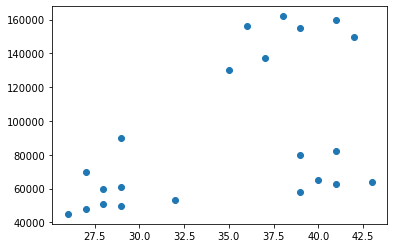

In [5]:
plt.scatter(df['Age'], df['Income($)'])

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [10]:
df['cluster'] = y_predicted

df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


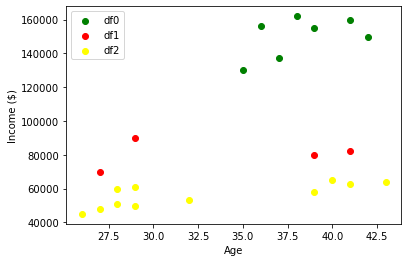

In [16]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='yellow')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend(['df0', 'df1', 'df2'])

Here, the cluster green is good, but both yellow, red are not grouped correctly. This is because of scaling on the y-axis.
So, preprocessing the data is really importent.

In [19]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


Now, the scaling has been done. Let's, try running K-Means clusters.

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster'] = y_predicted

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [24]:
# 2. Let's find the centroids of the clusters.

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

(X,Y) 3 Centroids

Finding the Sum of Squared Error.

In [29]:
km.inertia_

0.4750783498553095

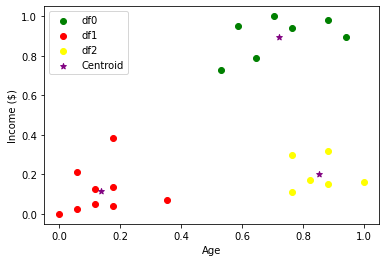

In [30]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='yellow')

# 2. Let's add the centroids to have a better visualization.
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend(['df0', 'df1', 'df2', 'Centroid'])

Now, the clusters have formed fine and looks great!

 Since, this data set is smaller and is only having 3 clusters. We directly assumed the no.of clusters as 3. But, practically the data might have n-dimensions. So, finding the clusters can be done using the elbow method as we discussed in theory.

In [32]:
sse = []
k_rng = range(1,10) #Assuming the range as 10 for finding the elbow.
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse

C:\Users\udaya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.2105547899547249,
 0.1747358607922592,
 0.13781880133764024,
 0.10383752586603559]

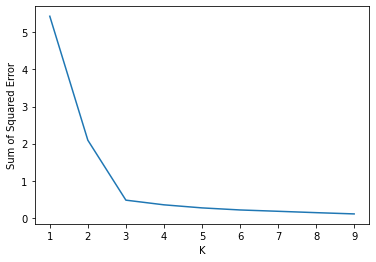

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

So, as we discussed in the theory the elbow is keenly noticed at 3. So, the no.of clusters  